## Abstract

In this notebook, our main aim is to learn about H2O. H2O is an open source, in-memory, distributed, fast, and scalable machine learning and predictive analytics platform that allows you to build machine learning models on big data and provides easy productionalization of those models in an enterprise environment. To get an hands-on experience, professor asked us to enter into a Kaggle competition. We chose ["Porto Seguro’s Safe Driver Prediction"](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) in which we are supposed to predict the problity that driver will initiate auto insurance claim next year. All the variable names and values are masked by the competition owner. For us the best model was "XGBoost with best hyper parameters" given by the H2O automl. Competion scoring criteria was "Normalized Gini Index", so to check the score we always need to submit our predictions. Our best score was 0.28087 and the competitions table topper score was 0.29698.

## Exploratory Data Analysis

Here, we are going to explore variables and their relation with each other and with the target variable

In [1]:
#Necessary imports for EDA
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading Dataset
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [3]:
data_train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
data_train.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we can see there are 59 features out of which:
- Some are binary variables
- Some are categorical variables of which the category values are integers
- Other variables with integer or float values
- Variables with -1 represents missing values
- The target variable and an ID variable

In [8]:
#Let's see if they have some duplicate values
print("Shape before removing duplicates: " + str(data_train.shape))
data_train.drop_duplicates()
print("Shape after removing duplicates: " + str(data_train.shape))

Shape before removing duplicates: (595212, 59)
Shape after removing duplicates: (595212, 59)


As we can see, there are no duplicate values so we don't need to worry about duplicate values.

In [10]:
#As we know, our missing values are represented by -1 let's check how many values are present

(data_train==-1).sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


As we can see 2 features have lot of missing values, so rather than filling the missing values will remove that feature as it can insert noise.

In [11]:
#Before removing them let's check the percentage of missing values

vars_with_missing = []

for f in data_train.columns:
    missings = data_train[data_train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/data_train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 216 records (0.04%) with missing values
Variable ps_ind_04_cat has 83 records (0.01%) with missing values
Variable ps_ind_05_cat has 5809 records (0.98%) with missing values
Variable ps_reg_03 has 107772 records (18.11%) with missing values
Variable ps_car_01_cat has 107 records (0.02%) with missing values
Variable ps_car_02_cat has 5 records (0.00%) with missing values
Variable ps_car_03_cat has 411231 records (69.09%) with missing values
Variable ps_car_05_cat has 266551 records (44.78%) with missing values
Variable ps_car_07_cat has 11489 records (1.93%) with missing values
Variable ps_car_09_cat has 569 records (0.10%) with missing values
Variable ps_car_11 has 5 records (0.00%) with missing values
Variable ps_car_12 has 1 records (0.00%) with missing values
Variable ps_car_14 has 42620 records (7.16%) with missing values
In total, there are 13 variables with missing values


In [12]:
#removing columns with lot of missing values
data_train = data_train.drop(["ps_car_03_cat","ps_car_05_cat"], axis=1)

##### As we saw there are mixed type of variables lets split them into according to their type.

In [13]:
all_features = data_train.columns.tolist()
all_features.remove('target')
# Numeric Features
numeric_features = [x for x in all_features if x[-3:] not in ['bin', 'cat']]
# Categorical Features
categorical_features = [x for x in all_features if x[-3:]=='cat']
# Binary Features
binary_features = [x for x in all_features if x[-3:]=='bin']

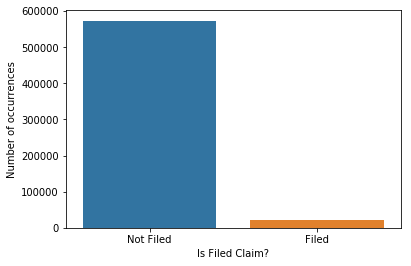

In [15]:
#Let's check how many times driver has intiated claims in training set
sns.countplot(data_train['target'].map({0: 'Not Filed', 1: 'Filed'}));
plt.xlabel('Is Filed Claim?');
plt.ylabel('Number of occurrences');
plt.show()

We can infer that in the training set drivers mostly haven't filed an auto insurance claim. So, we can predict that in the test set probablity of drivers intiating auto insurance claim will be very low.

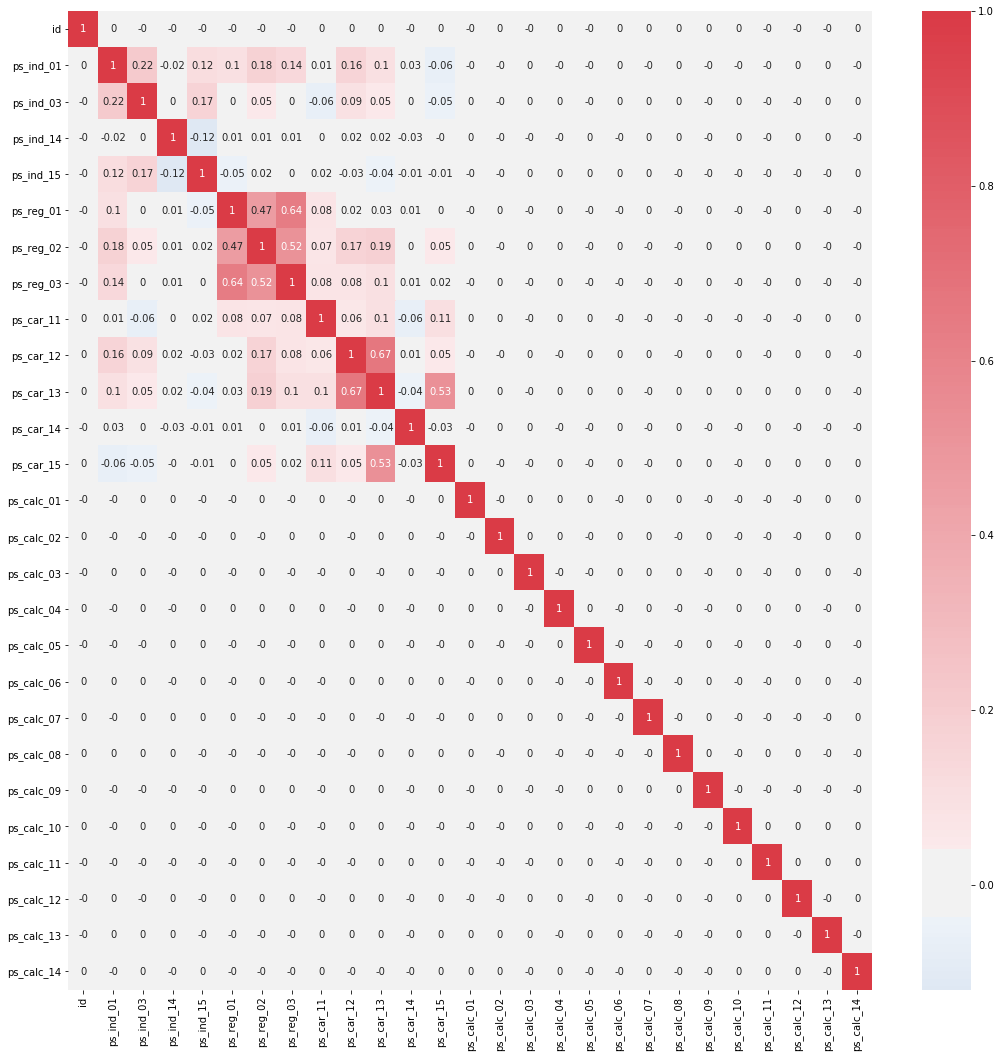

In [17]:
#Let's check co-relation between our numeric variables

cor_matrix = data_train[numeric_features].corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(18,18));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

From the above figure, we can infer that there are very few features which are highly co-related which should be kept while doing predictions.

**Features which are correlated are:**

- ps_reg_01 and ps_reg_03 <font color=red>(0.64)</font>
- ps_reg_02 and ps_reg_01 <font color=red>(0.47)</font>
- ps_reg_02 and ps_reg_03 <font color=red>(0.52)</font>
- ps_car_13 and ps_car_15 <font color=red>(0.53)</font>
- ps_car_13 and ps_car_12 <font color=red>(0.67)</font>

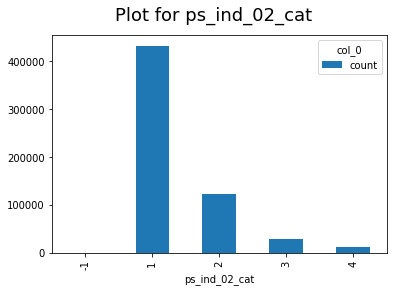

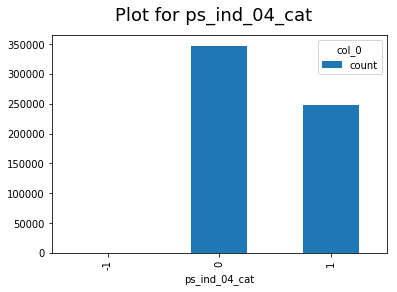

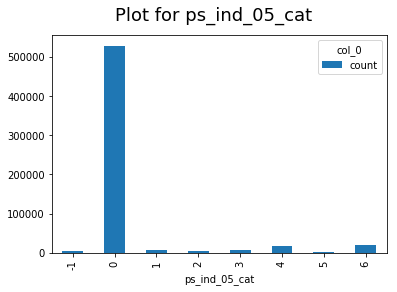

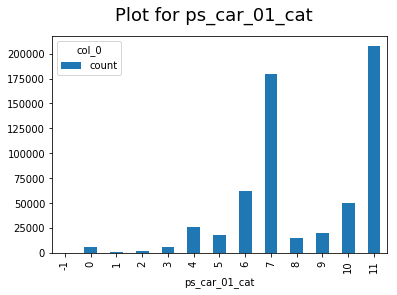

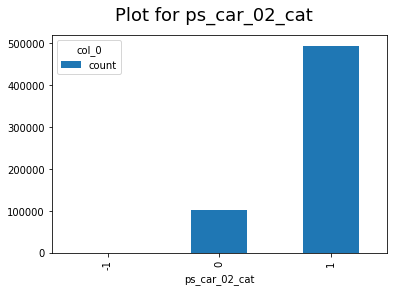

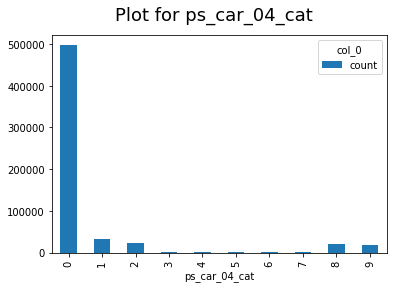

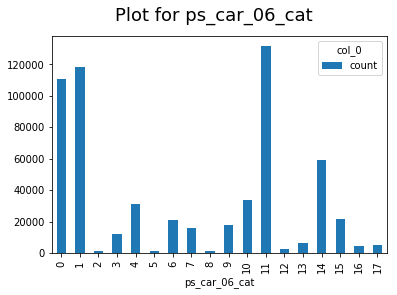

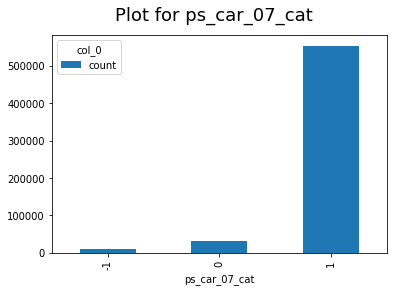

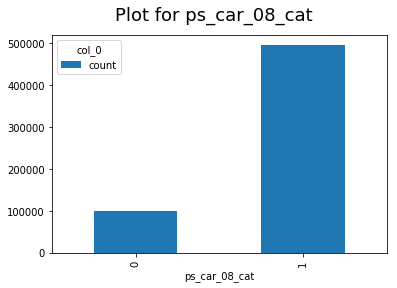

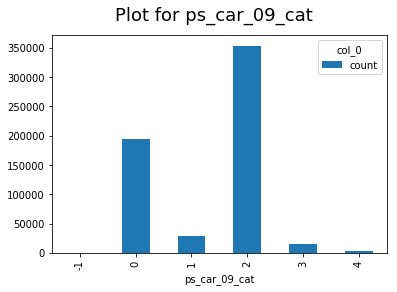

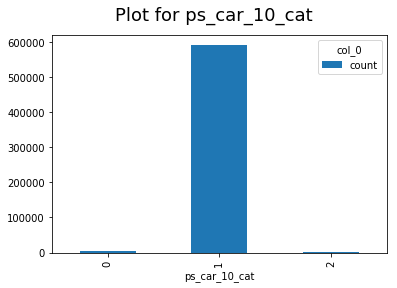

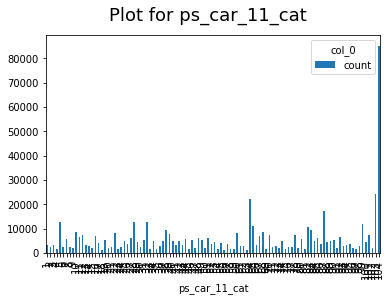

In [19]:
#Exploring Categorical variables individually
for column in categorical_features:
    my_tab = pd.crosstab(index = data_train[column],  # Make a crosstab
                              columns="count")      # Name the count column
    my_tab.plot.bar()
    plt.suptitle('Plot for '+column, fontsize=18)

We can see that there are very less number of categorical values which has missing values..
Also, we can see that one category in each variable is dominating i.e. count of that category is exceptionlly higher than the other categories. We can infer that the result given by these variables will be biased towards that category.

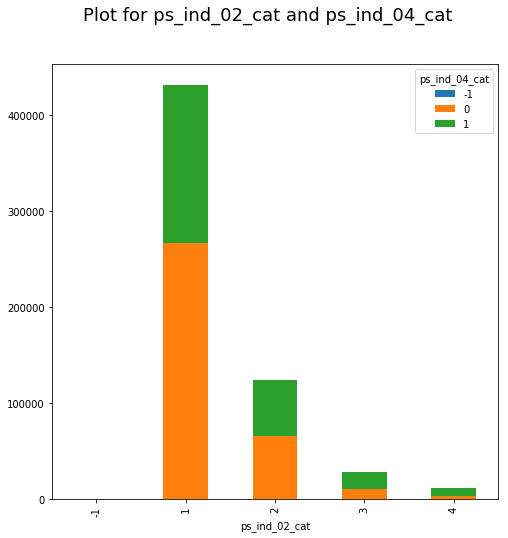

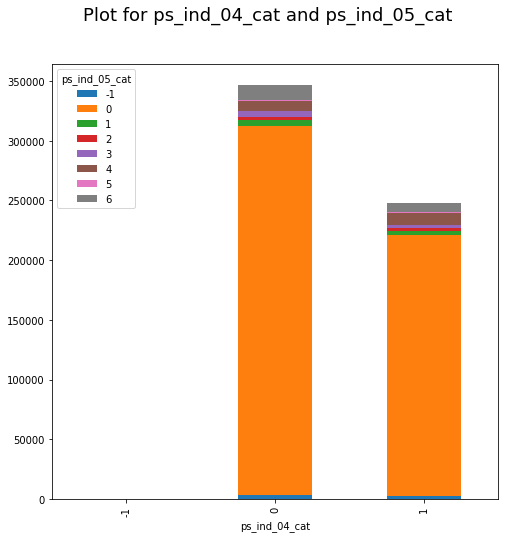

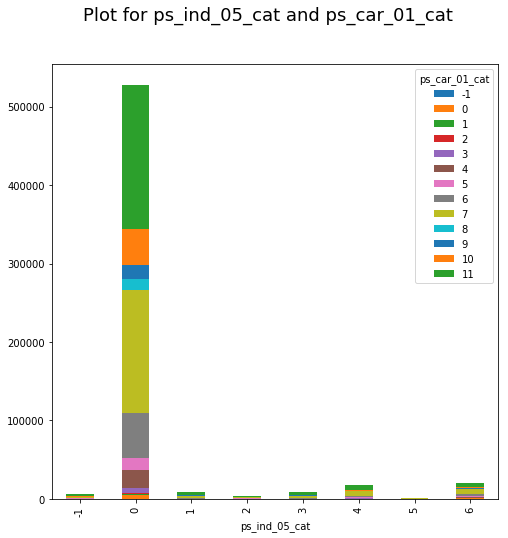

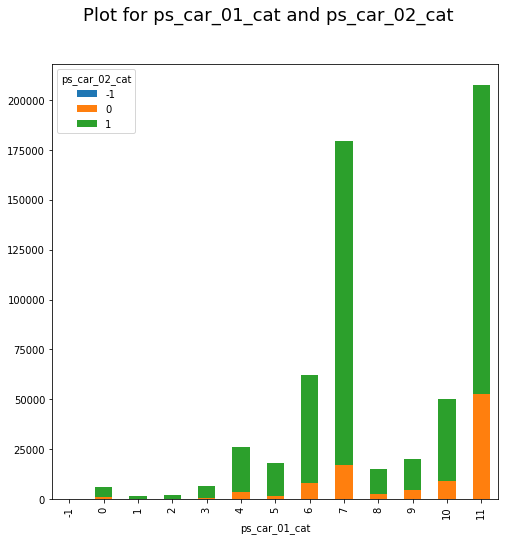

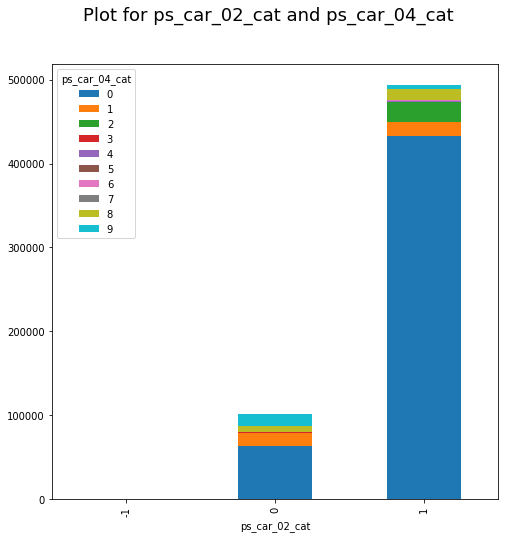

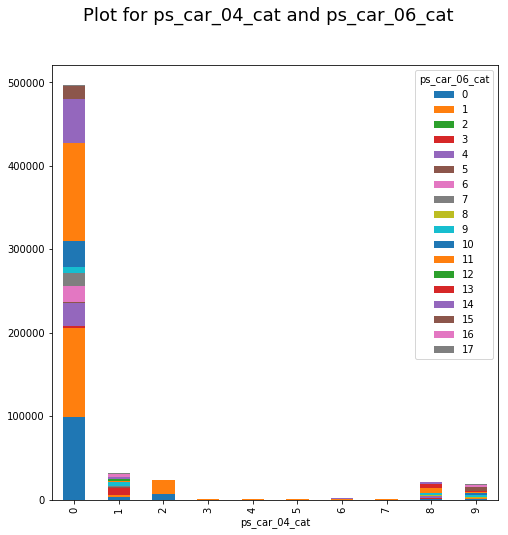

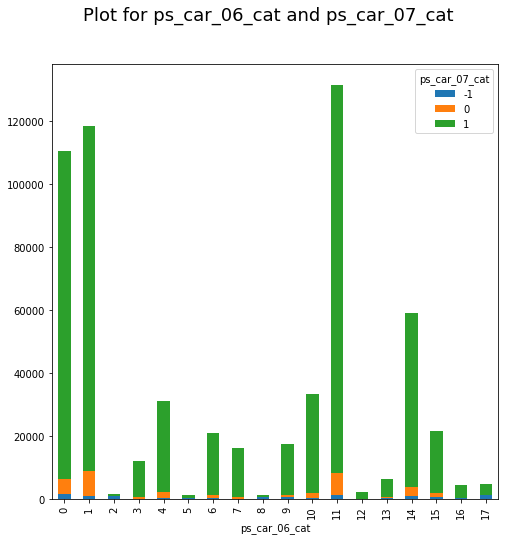

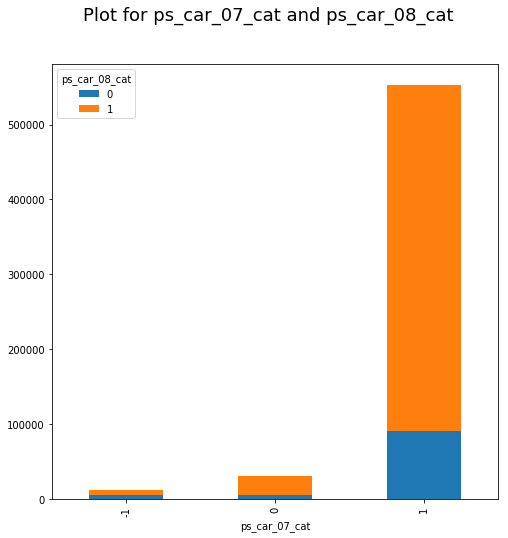

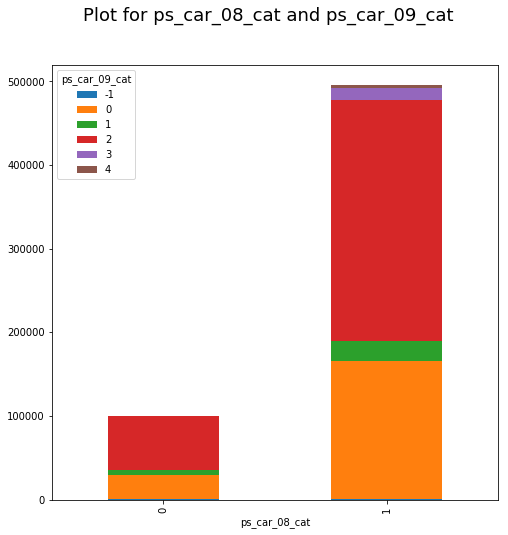

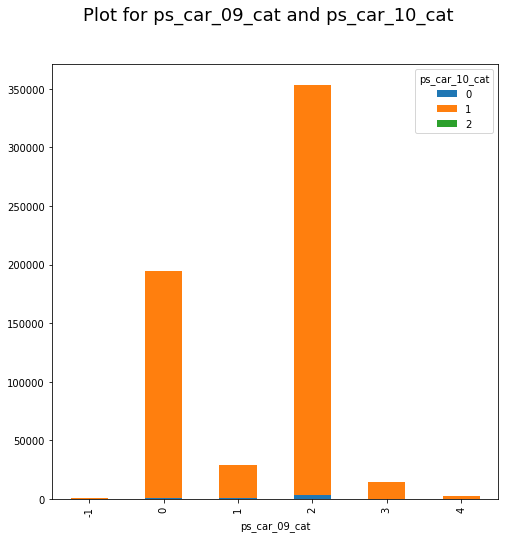

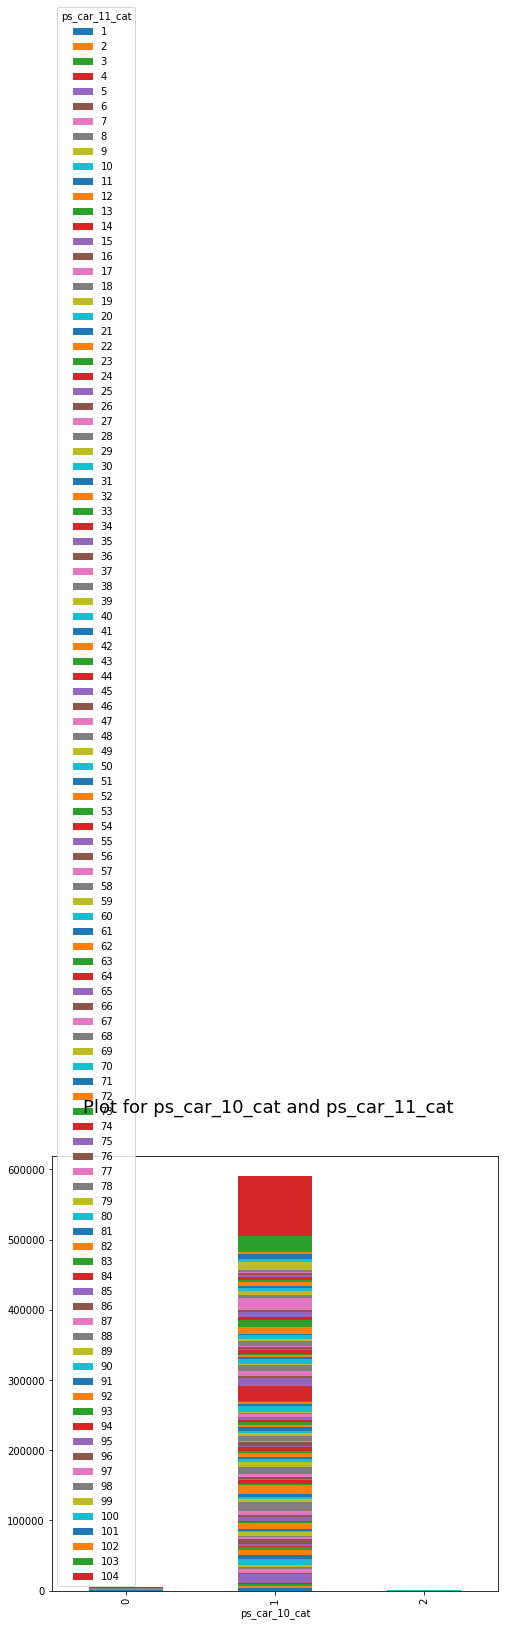

In [23]:
#Bi-variate analysis for categorical variable
for i in range(0,len(categorical_features)-1):
    categorical_table = pd.crosstab(index=data_train[categorical_features[i]], 
                          columns=data_train[categorical_features[i+1]])
    
    categorical_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)
    plt.suptitle('Plot for '+categorical_features[i] + " and " + categorical_features[i+1], fontsize=18)

From this, we can infer that when these categorical variables are compared to each other, the results are not giving any proper analysis but, the column ps_car_02_cat and ps_car_01_cat are highly related to each other. Same way few more are related to each other. 

**Since there are many missing values, let's check how categorical variables impact our target variable with value 1**

<Figure size 432x288 with 0 Axes>

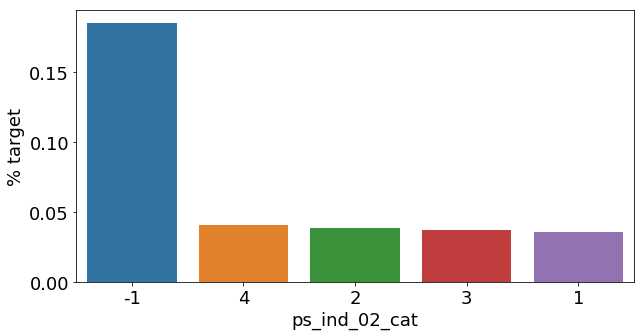

<Figure size 432x288 with 0 Axes>

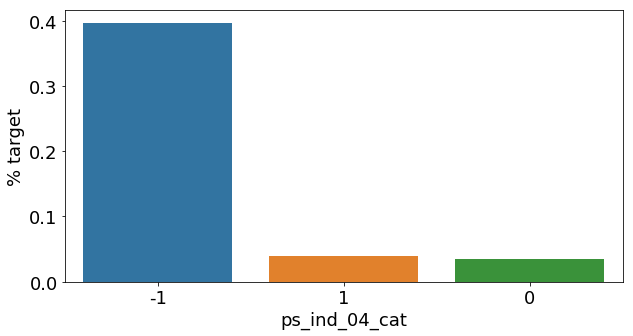

<Figure size 432x288 with 0 Axes>

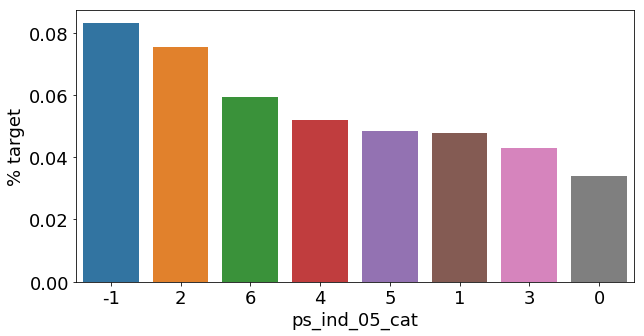

<Figure size 432x288 with 0 Axes>

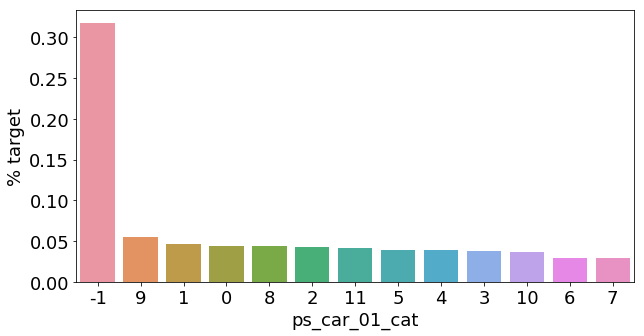

<Figure size 432x288 with 0 Axes>

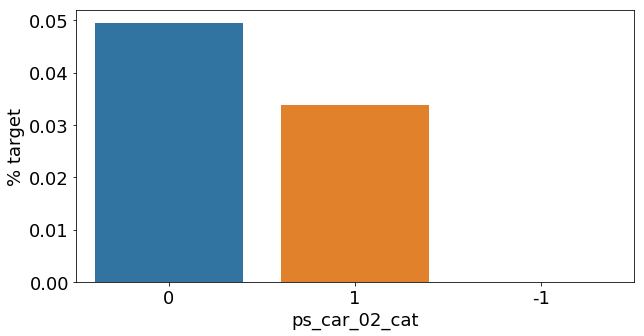

<Figure size 432x288 with 0 Axes>

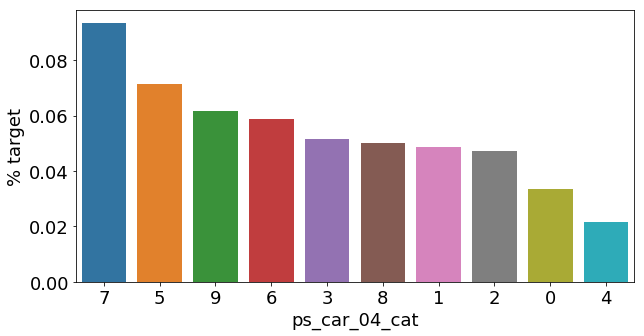

<Figure size 432x288 with 0 Axes>

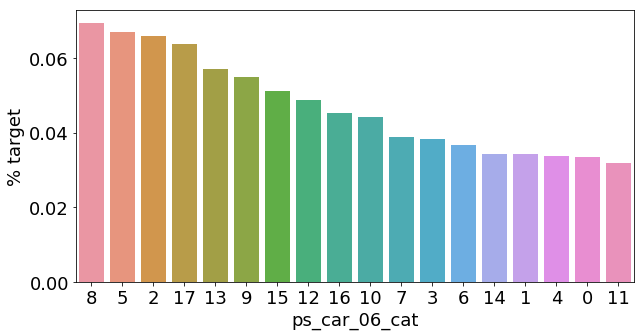

<Figure size 432x288 with 0 Axes>

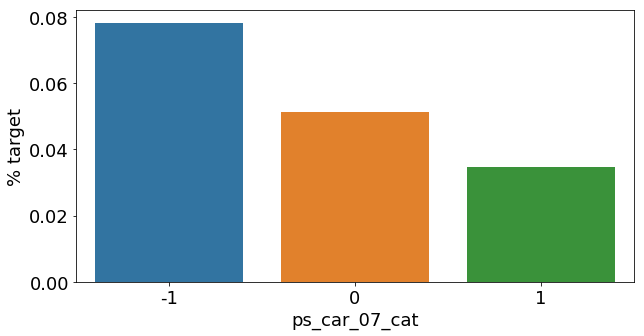

<Figure size 432x288 with 0 Axes>

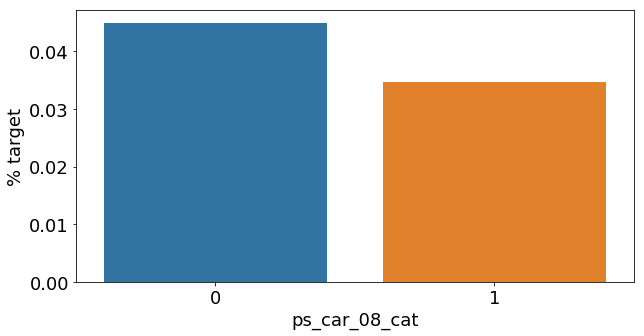

<Figure size 432x288 with 0 Axes>

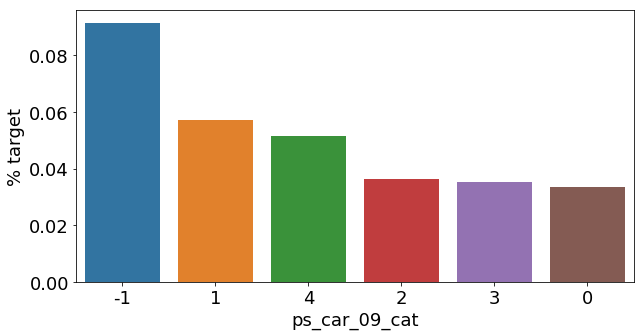

<Figure size 432x288 with 0 Axes>

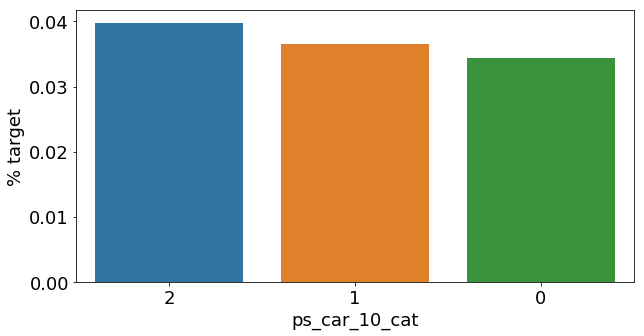

<Figure size 432x288 with 0 Axes>

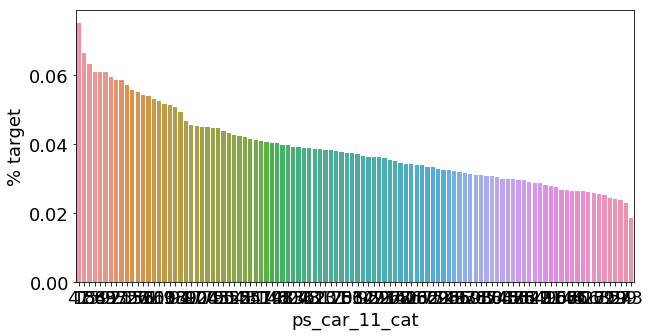

In [25]:
for f in categorical_features:
    plt.figure()
    fig, ax = plt.subplots(figsize=(10,5))
    # Calculate the percentage of target=1 per category value
    cat_perc = data_train[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

As we can see, impact of **missing values** on the target variable with value -1 is very high. We can infer that probability of drivers claiming insurance with missing information will be greater. So for now we will keep the missing the data as it is for our prediction

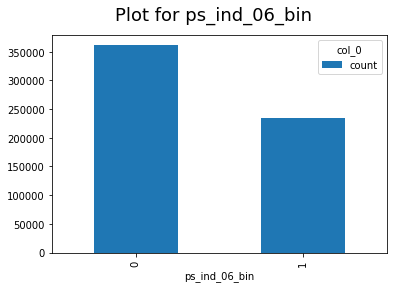

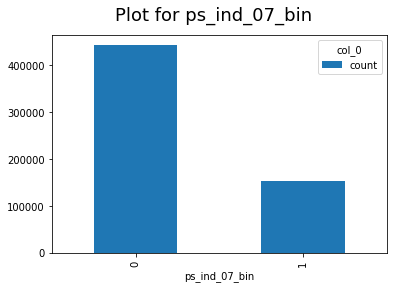

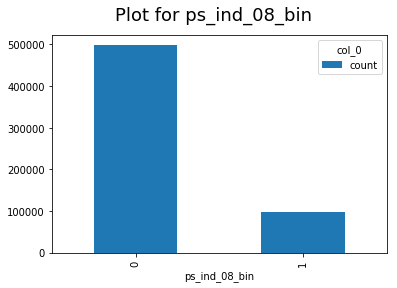

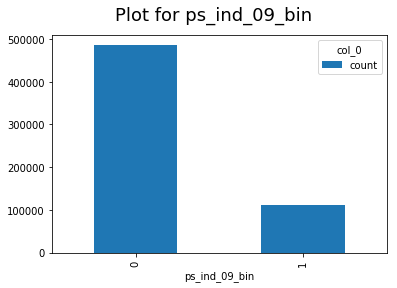

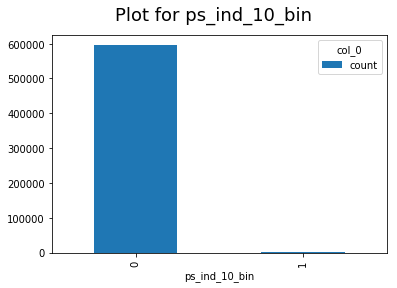

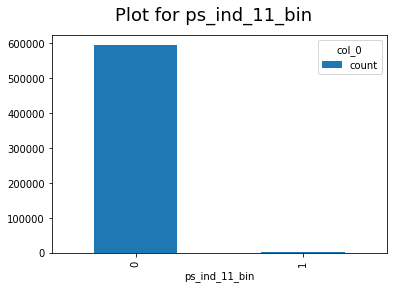

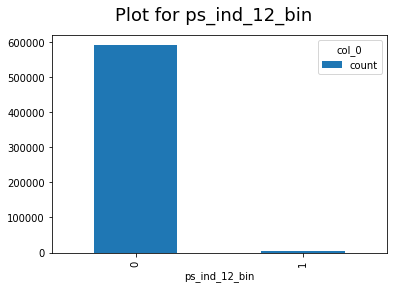

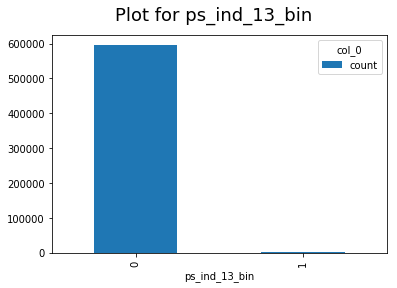

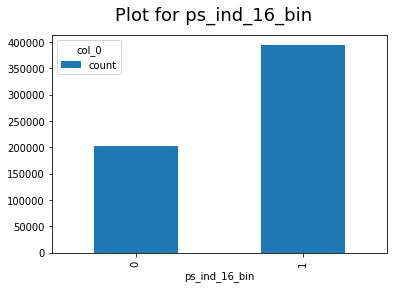

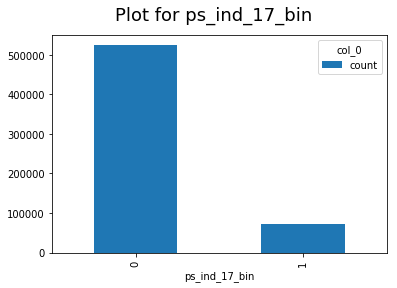

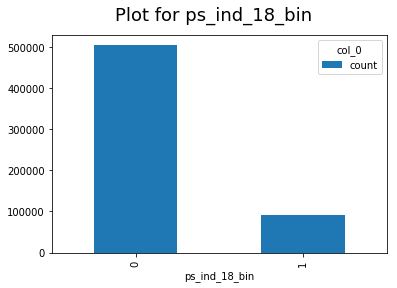

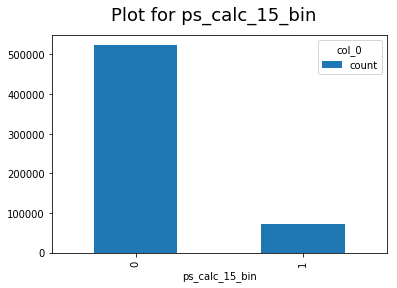

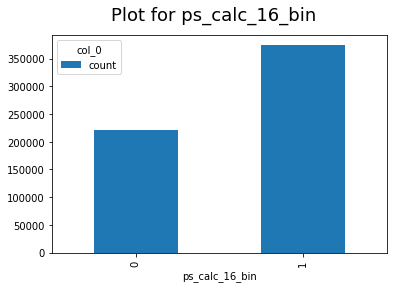

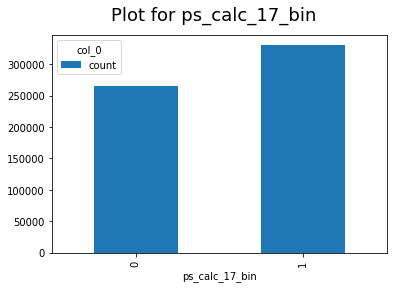

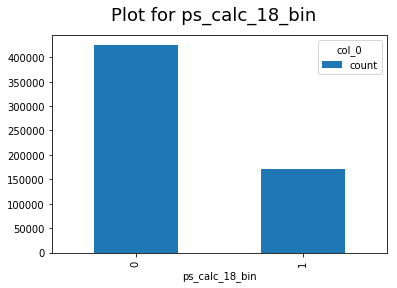

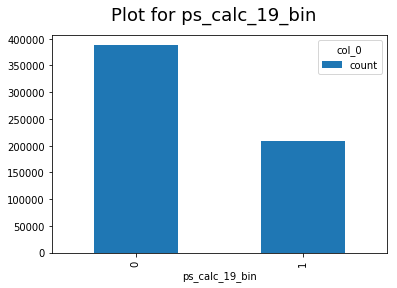

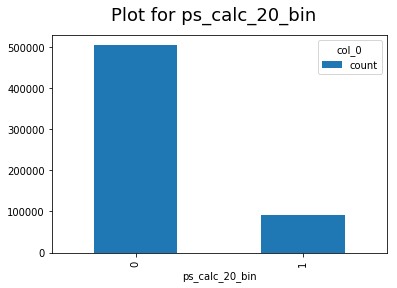

In [26]:
#Let's take a look at binary variable:

for column in binary_features:
    my_tab = pd.crosstab(index = data_train[column],  # Make a crosstab
                              columns="count")      # Name the count column
    my_tab.plot.bar()
    plt.suptitle('Plot for '+column, fontsize=18)

We can infer that, there are more number of zeros in the binary column from which we can say that there will be an impact of zeros in our prediction.

**Now let's check the impact of binary variables on target with value 1**

<Figure size 432x288 with 0 Axes>

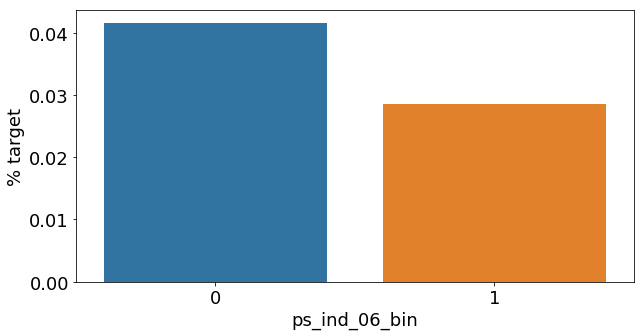

<Figure size 432x288 with 0 Axes>

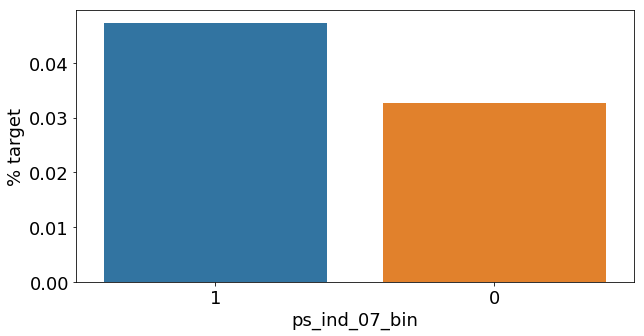

<Figure size 432x288 with 0 Axes>

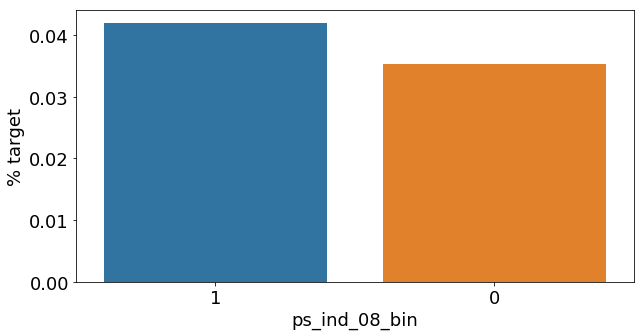

<Figure size 432x288 with 0 Axes>

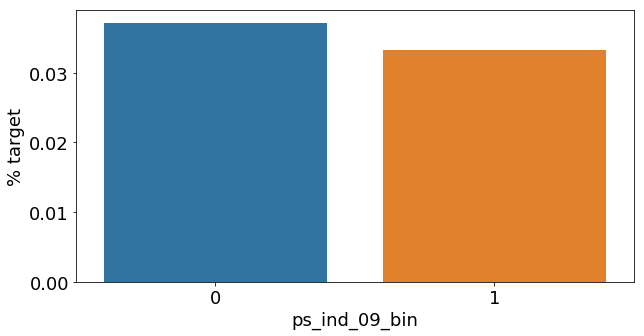

<Figure size 432x288 with 0 Axes>

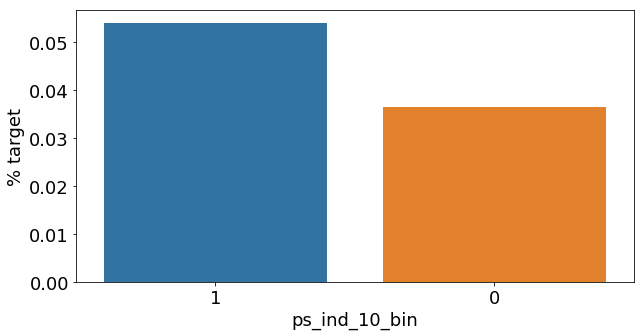

<Figure size 432x288 with 0 Axes>

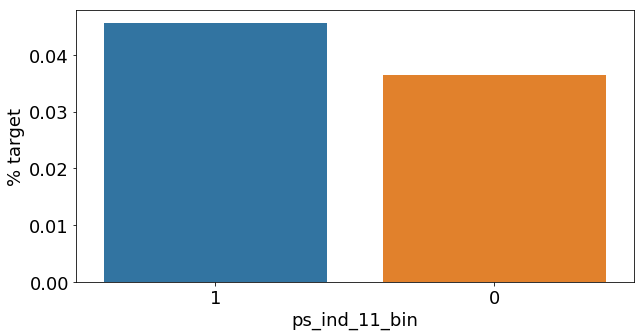

<Figure size 432x288 with 0 Axes>

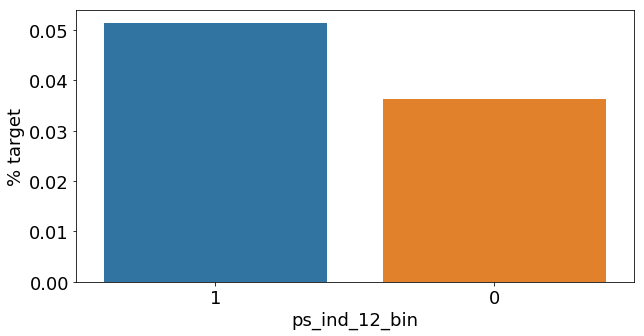

<Figure size 432x288 with 0 Axes>

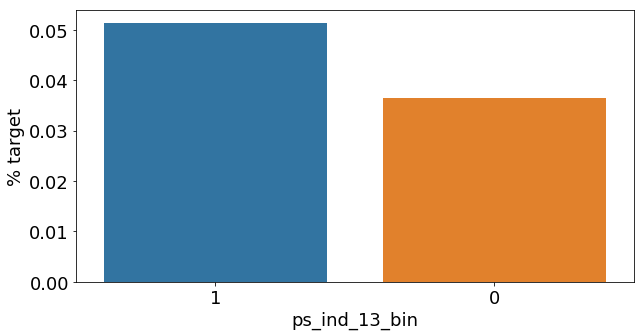

<Figure size 432x288 with 0 Axes>

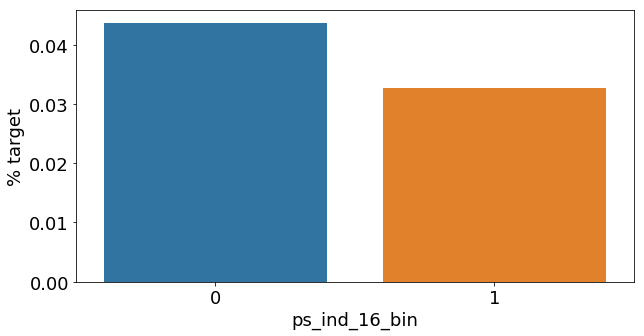

<Figure size 432x288 with 0 Axes>

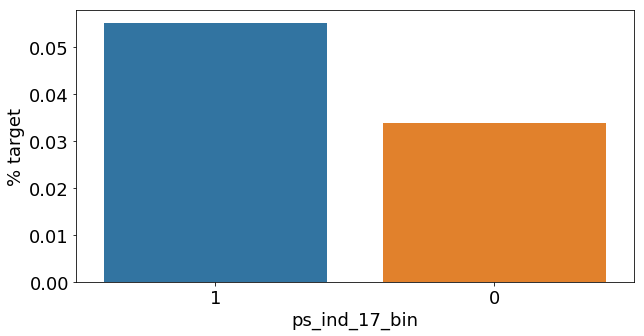

<Figure size 432x288 with 0 Axes>

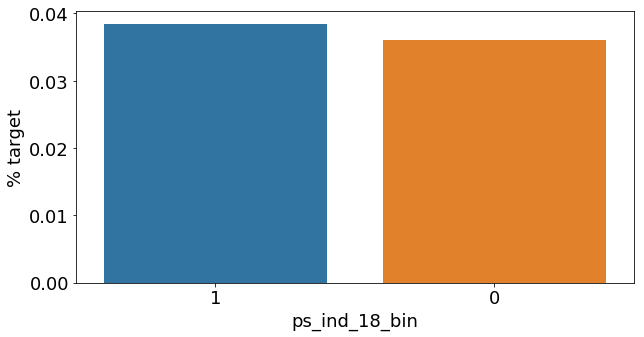

<Figure size 432x288 with 0 Axes>

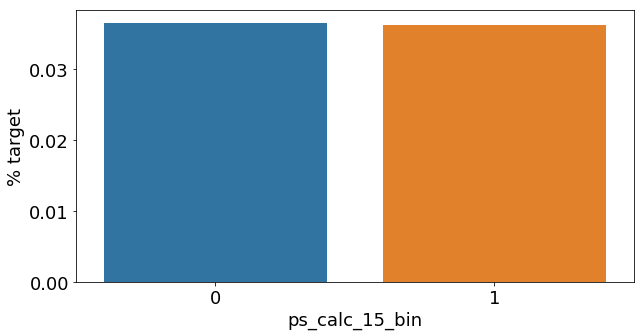

<Figure size 432x288 with 0 Axes>

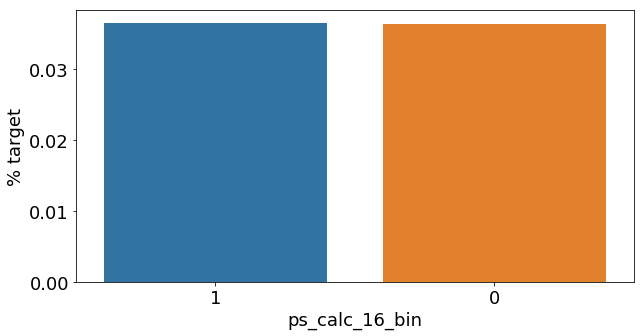

<Figure size 432x288 with 0 Axes>

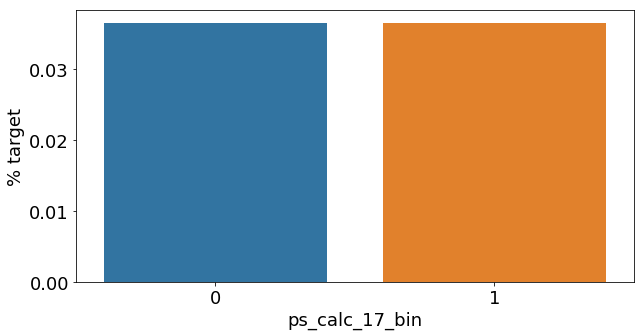

<Figure size 432x288 with 0 Axes>

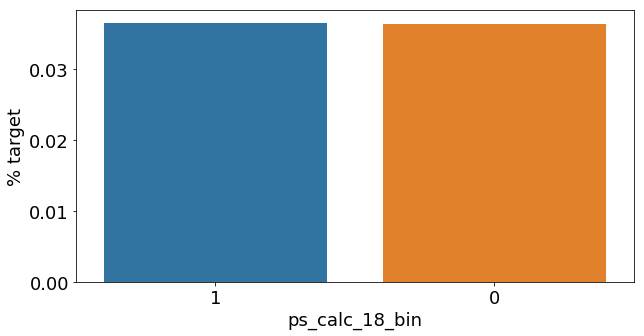

<Figure size 432x288 with 0 Axes>

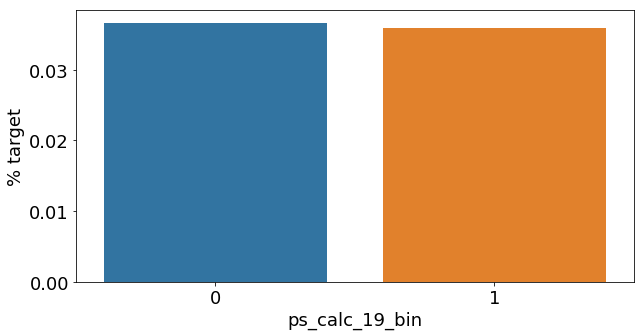

<Figure size 432x288 with 0 Axes>

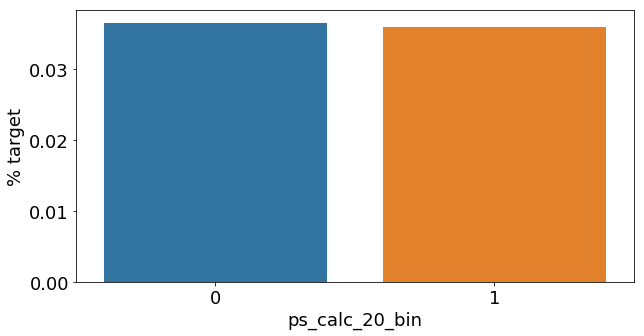

In [27]:
for f in binary_features:
    plt.figure()
    fig, ax = plt.subplots(figsize=(10,5))
    # Calculate the percentage of target=1 per category value
    cat_perc = data_train[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

That's quite interesting, though there are more zero's the target value is 1 when most of the binary variables are 1. In some cases the effect is similar. We can infer that, probility won't effect much on the binary variables but they are important.

## Predictions and Approches

### We tried 2 approaches:

1. Regression
2. Classification

### Regression:

As we know, we are determining the probablity which will be between 0 and 1 so we first ran our H2O automl using regression and we found out our top model is **"stacked ensemble model"** and best single model is **"GBM"**. Here is the code snippet:


![H2O autoML with raw data](./h2o_regression1.jpg)

**Note:** This is the first run where we provided the raw data with missing values.

Here is our score after predicting and submitting our score using both models:


![Scores](./submission1.jpg)

The best score by the table topper was 0.29698 and our best score was 0.27577. Not bad! We can improve.


After this, since we got the best model is GBM, we thought why don't we run this with H20's provided GBM model:


Here is the code snippet of just GBM with default parameters:

![gbm](./simple_gbm.jpg)


Here is our score with GBM with default parameters:

![gbm1](./gbm1.jpg)



Here is the code snippet of GBM with tuned hyperparameters:

![gbm2](./gbm_t.jpg)


Here is our score with GBM with tuned hyperparameters:

![gbm3](./gbm2.jpg)


Not bad! With an increase of more than **0.04** with customised model! So, here we thought of providing cleaned data now and check the results.


#### Data Cleaning:

As we discussed above, variables ps_car_03_cat and ps_car_05_cat have too many missing values we will be removing those columns and after that we filled our missing values with mean.

Used following code for filling missing values:
for f in data_train.columns:
    data_train[f] = data_train[f].replace(-1, data_train[f].mean())
    
Here is the code snippet of H2O autoML after cleaning the data:

![gbm3](./h2o.jpg)

As we can see the value of RMSE is greater than previous model, so we can say that our score will be less than the previous one. But still we checked:

![Scores](./submission.jpg)

Yup, as we discussed above the value of the RMSE was greater so the score came out to be less. **Also, point to be noted is that we predicted earlier that the missing values have huge impact on the target variable and data with missing value gave us higher accuracy!**


### Classification:

When determining the probability of an occurance, a way to ensure the model doesn't go outside the bounds of 0 to 1 is to use a binary classifier. In this case we were prediciting the probability that a driver would file a claim. To do this we classified 0 or 1 for the target variable and utilized the 'p1' value for the kaggle submission file. Two types of experiments were conducted. One with all available features and one with a reduced number of features. This was done to see if the reduced noise would increase predictive ablility. The best model achieved from all available features was an implementation of XGBoost. Note, screenshots of this leaderboard are not available because it was overwritten and h2o was updated after this XGBoost model's creation.

![pic](./allFeatures.png)

Already we're seeing an increase of performance by moving towards a binary classification approach. Next we drop all of the non-predicitve 'calc' type features (features with calc in the name).

![pic](./classifyLeaderboard.png)

From this leaderboard, the top two XGBoost, the stacked ensemble, and the generalized linear model were used for a kaggle submission.

![pic](./colReduce.png)

The generalized linear model and XGBoost2 were overfit on the training data. The stacked ensemble performed very close to the 'all features' XGBoost model from previous. XGBoost1 did increase performance over the 'all features' XGBoost model by 0.0005. The feature importance plot is below.

![pic](./featureImp.png)

Now these features are masked variables by Porto, so they don't necessarily mean anything at present. When unencoded though, this insight could help them to determine better pricing models for their customers.

## Conclusion

Overall, we were able to utilize a distributed system, H2O, to determine predictive power of auto claim filing data. By looking at regression and classification techniques we were able to show how defining the bounds increased performance of the predictive model. In the end our best score came out to be 0.28089, which was off of the top score at 0.29698.

## Contribution Statement

#### Summary of other kernels and what we did:

1. Some kernels did analysis based on different type of variables but, additionally what we did was we compared each type of variable with each other. For example, numerical vs numerical, categorical vs categorical, etc.
2. Some kernels didn't played with missing values but, we did whole analysis on missing values and made predictions using that. And we did predictions based on missing values and after filling missing values.
3. Other kernels used scikit-learn algorithms but, we used purely H2O and we also did hyper-parameter tuning on H2O models.
4. Other models doesn't have proper explanation of charts as we have.
5. The class repository was used heavily to assist in learning h2o functions and implementations.

## Citations

- H2O: http://docs.h2o.ai/h2o/latest-stable/h2o-docs/welcome.html
- Kernel1: https://www.kaggle.com/bertcarremans/data-preparation-exploration
- Kernel2: https://www.kaggle.com/neviadomski/data-exploration-porto-seguro-s-safe-driver
- Kernel3: https://www.kaggle.com/arthurtok/interactive-porto-insights-a-plot-ly-tutorial
- Class Repo: https://github.com/nikbearbrown/CSYE_7245
- Libraries:
    - https://matplotlib.org/tutorials/index.html
    - https://seaborn.pydata.org/introduction.html
    - https://pandas.pydata.org/
    - https://docs.scipy.org/doc/numpy/user/quickstart.html

## License

Copyright 2019 Peter Vayda and Rupesh Acharya

Permission is hereby granted, free of charge, to any person obtaining a copy of this Notebook and associated documentation files, to deal in the notebook without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Notebook.

THE NOTEBOOK IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.